<a href="https://colab.research.google.com/github/aminatulmaimuna/pengolahan-citra-digital/blob/main/Operasi_Geometri_pada_Citra_Digital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2. Flipping horizontal hasil rotasi
Tujuan: memutar citra sebesar 30° dan memperbesar ukuran sebesar 1.2×.
Kode:



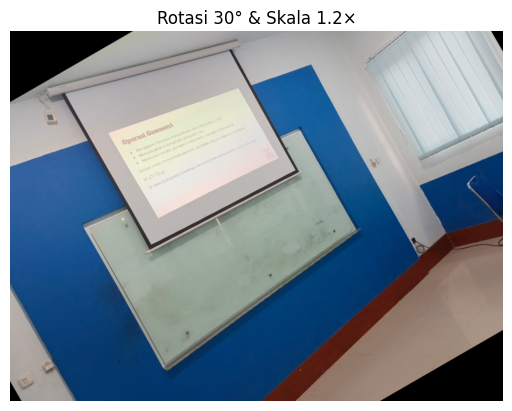

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Baca gambar
img = cv2.imread('/content/foto_papantulis.jpg')
rows, cols = img.shape[:2]

# Matriks rotasi
M = cv2.getRotationMatrix2D((cols/2, rows/2), 30, 1.2)
rotated = cv2.warpAffine(img, M, (cols, rows))

# Tampilkan hasil
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.title("Rotasi 30° & Skala 1.2×")
plt.axis('off')
plt.show()


**Penjelasan:**
Transformasi rotasi dilakukan dengan fungsi cv2.getRotationMatrix2D, di mana parameter ketiga adalah faktor skala. Operasi ini memutar gambar searah jarum jam dan memperbesar tampilannya sebesar 1.2 kali dari ukuran asli.

Tujuan: membalik hasil citra rotasi secara horizontal.
Kode:

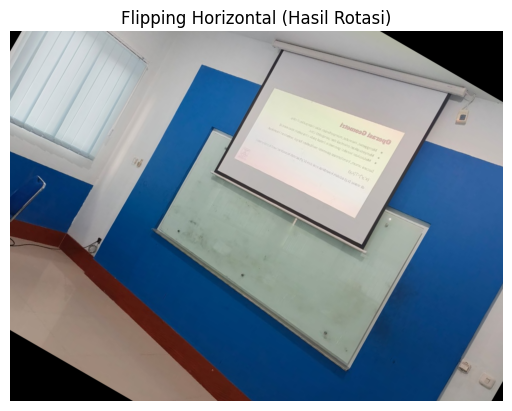

In [ ]:
# Flipping horizontal
flip_horizontal = cv2.flip(rotated, 1)

# Tampilkan hasil
plt.imshow(cv2.cvtColor(flip_horizontal, cv2.COLOR_BGR2RGB))
plt.title("Flipping Horizontal (Hasil Rotasi)")
plt.axis('off')
plt.show()


Penjelasan:
Transformasi rotasi dilakukan dengan fungsi cv2.getRotationMatrix2D, di mana parameter ketiga adalah faktor skala. Operasi ini memutar gambar searah jarum jam dan memperbesar tampilannya sebesar 1.2 kali dari ukuran asli.

3. Ubah perspektif agar papan tulis tampak lurus

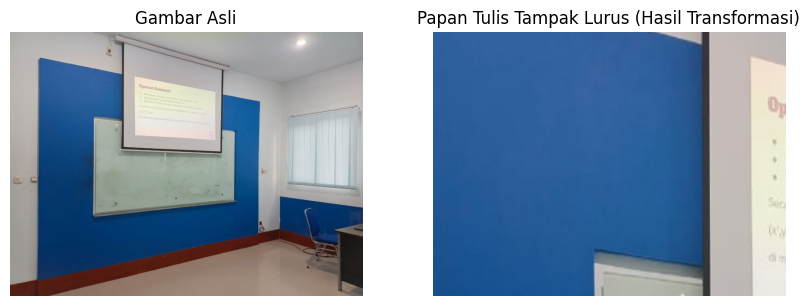

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar
img = cv2.imread('/content/foto_papantulis.jpg')

# Titik sudut papan tulis pada gambar (disesuaikan dengan posisi di foto)
# Urutan: kiri atas, kanan atas, kiri bawah, kanan bawah
pts1 = np.float32([[160, 150], [485, 145], [155, 340], [485, 340]])

# Titik tujuan (bidang hasil transformasi)
pts2 = np.float32([[0, 0], [400, 0], [0, 300], [400, 300]])

# Matriks transformasi perspektif
M_persp = cv2.getPerspectiveTransform(pts1, pts2)

# Terapkan transformasi perspektif
perspective = cv2.warpPerspective(img, M_persp, (400, 300))

# Tampilkan hasil
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Gambar Asli")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(perspective, cv2.COLOR_BGR2RGB))
plt.title("Papan Tulis Tampak Lurus (Hasil Transformasi)")
plt.axis('off')

plt.show()



**Penjelasan:**
Transformasi perspektif digunakan untuk meluruskan bidang miring menjadi tegak lurus terhadap pandangan kamera. Fungsi cv2.getPerspectiveTransform() menghitung matriks 3×3 dari empat pasang titik (sebelum dan sesudah).

4. Tampilkan semua hasil transformasi bersama Tujuan: membandingkan hasil setiap transformasi.
Kode:

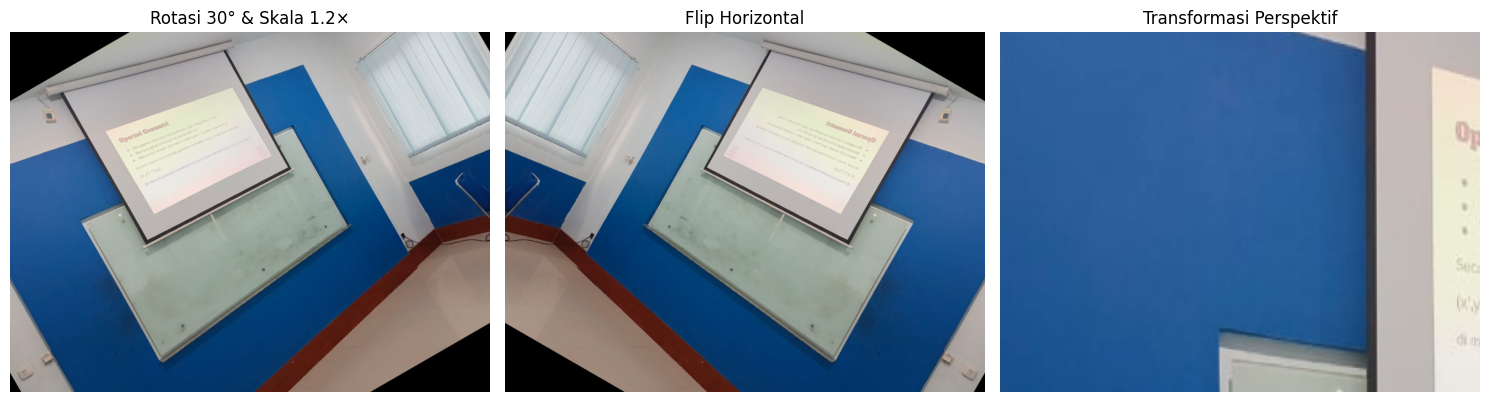

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar
img = cv2.imread('/content/foto_papantulis.jpg')
rows, cols = img.shape[:2]

# === 1. Rotasi 30° dan skala 1.2x ===
M_rot = cv2.getRotationMatrix2D((cols/2, rows/2), 30, 1.2)
rotated = cv2.warpAffine(img, M_rot, (cols, rows))

# === 2. Flip horizontal hasil rotasi ===
flip_horizontal = cv2.flip(rotated, 1)

# === 3. Transformasi perspektif papan tulis ===
pts1 = np.float32([[160, 150], [485, 145], [155, 340], [485, 340]])
pts2 = np.float32([[0, 0], [400, 0], [0, 300], [400, 300]])
M_persp = cv2.getPerspectiveTransform(pts1, pts2)
perspective = cv2.warpPerspective(img, M_persp, (400, 300))

# === 4. Tampilkan hasil secara berdampingan ===
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
axs[0].set_title("Rotasi 30° & Skala 1.2×")

axs[1].imshow(cv2.cvtColor(flip_horizontal, cv2.COLOR_BGR2RGB))
axs[1].set_title("Flip Horizontal")

axs[2].imshow(cv2.cvtColor(perspective, cv2.COLOR_BGR2RGB))
axs[2].set_title("Transformasi Perspektif")

# Hilangkan axis agar tampilan bersih
for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.show()



**Hasil Visual:**



Kiri: Citra setelah rotasi dan skala.

Tengah: Citra hasil flipping horizontal.

Kanan: Citra hasil transformasi perspektif.


